Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



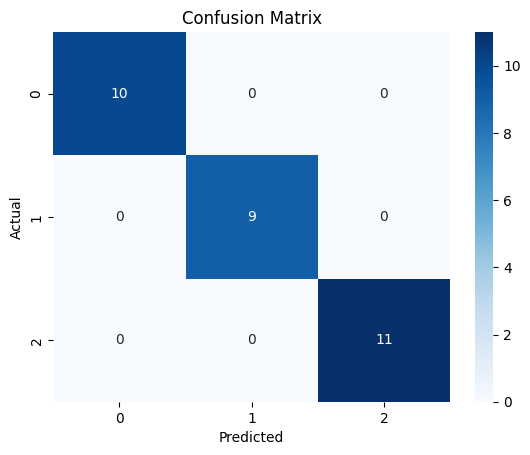

In [1]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Load dataset
dataset = pd.read_csv("C:\\Users\\user\\Downloads\\Iris.csv")
# Sudah dimuat sebelumnya, kita lanjutkan ke preprocessing

# 2. Preprocessing
# Menghapus kolom 'Id' karena tidak relevan
dataset = dataset.drop(columns=['Id'])

# Mengencode kolom 'Species' menjadi numerik
dataset['Species'] = dataset['Species'].astype('category').cat.codes

# 3. Feature selection
# Misalkan kita memilih semua fitur kecuali kolom 'Species' sebagai X, dan 'Species' sebagai target (y)
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = dataset['Species'].values

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scaling (normalisasi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train model
# Menggunakan KNN dengan k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 7. Evaluate model
# Prediksi untuk data uji
y_test_pred = knn.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

# Visualisasi confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
